In [103]:
import numpy as np
import venn
from testing import eval_model
from config import Config

In [140]:
c = Config()
c.nfold = 5
c.data_name = 'Gm'
c.data_dir = '../../processed/' + c.data_name + '/imbalance_cv/'
c.target_dir = c.data_dir + 'cp_dir/'
c.nano = True
c.coverage_only = False
c.no_quality = False

In [141]:
c.model_funname = 'Nano2pO'
cp_dir = c.target_dir + c.model_funname.replace('create_', '') + '/'

In [142]:
nano_result = []
label_result = []
for i in np.arange(1, c.nfold + 1):
    c.cp_path = cp_dir + 'f' + str(i) + '_t1.ckpt'
    c.valid_idx = i
    results, y_label, y_pred = eval_model(c)
    if np.size(nano_result) ==0:
        nano_result = y_pred
        label_result = y_label
    else: 
        nano_result = np.concatenate((nano_result, y_pred), axis = 0)
        label_result = np.concatenate((label_result, y_label), axis = 0)
print(np.array(nano_result).shape)
print(np.array(label_result).shape)

Loading data!
Creating model
Loading data!
Creating model
Loading data!
Creating model
Loading data!
Creating model
Loading data!
Creating model
(16181, 1)
(16181, 1)


In [143]:
c.model_funname = 'Seq2pO'
cp_dir = c.target_dir + c.model_funname.replace('create_', '') + '/'

In [144]:
seq_result = []
for i in np.arange(1, c.nfold + 1):
    c.cp_path = cp_dir + 'f' + str(i) + '_t1.ckpt'
    c.valid_idx = i
    results, y_label, y_pred = eval_model(c)
    if np.size(seq_result) ==0:
        seq_result = y_pred
    else: 
        seq_result = np.concatenate((seq_result, y_pred), axis = 0)
print(np.array(seq_result).shape)
print(np.array(label_result).shape)    

Loading data!
Creating model
Loading data!
Creating model
Loading data!
Creating model
Loading data!
Creating model
Loading data!
Creating model
(16181, 1)
(16181, 1)


In [145]:
#Process sequence prediciton results
seq_int = np.zeros((seq_result.shape[0]))
for i in range(seq_result.shape[0]):
    if (seq_result[i]-0.5)>0:
        seq_int[i] = (i+1)
    else:
        seq_int[i] = (i+1)*seq_result.shape[0]
y_seq = seq_int.astype(int)

#Process sequence+nanopore prediciton results
nano_int = np.zeros((nano_result.shape[0]))
for i in range(nano_result.shape[0]):
    if (nano_result[i]-0.5)>0:
        nano_int[i] = (i+1)
    else:
        nano_int[i] = (i+1)*nano_result.shape[0]
y_nano = nano_int.astype(int)

#Process Nm_seq label
label_int = np.zeros((label_result.shape[0]))
for i in range(label_result.shape[0]):
    if (label_result[i]-0.5)>0:
        label_int[i] = (i+1)
    else:
        label_int[i] = (i+1)*nano_result.shape[0]
y_label = label_int.astype(int)

C:\Users\chels\anaconda3\envs\tensorflow\lib\site-packages\venn\_backwards_compatibility.py:16: UserWarning: `get_labels()` is retained for backwards compatibility; use `generate_petal_labels()` or the higher level `venn()` instead
  "`get_labels()` is retained for backwards compatibility; " +
C:\Users\chels\anaconda3\envs\tensorflow\lib\site-packages\venn\_backwards_compatibility.py:32: UserWarning: `venn3()` is retained for backwards compatibility; use `venn()` instead
  "use `venn()` instead"


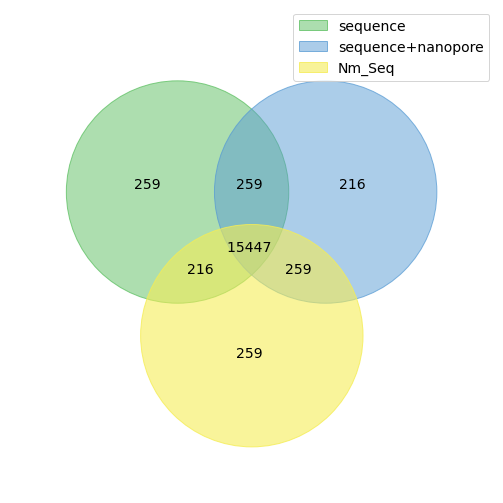

In [146]:
labels = venn.get_labels([set(y_seq), set(y_nano), set(y_label)], fill=['number'])
fig, ax = venn.venn3(labels, names=['sequence', 'sequence+nanopore', 'Nm_Seq'])
fig.savefig("graph_"+c.data_name+".png")